In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 3 # number states



In [3]:

cols = [ 'mediumslateblue','fuchsia','darkviolet' ]

In [4]:
#broad observations array
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
    


In [5]:
index = list(range(1))
T_obb= [[4, 1, 11],
                [2, 0, 1],
                [20, 1, 43]]

x1 = []
x2 = []
x3 = []
#T_obb = N_transitions
T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one*100 / np.sum(eigvec_one)
counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
#print('counts', counts)
#print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
      #np.sum(T_obb, axis=0))
x1.append(counts[0])
x2.append(counts[1])
x3.append(counts[2])

[[4, 1, 11], [2, 0, 1], [20, 1, 43]] 
 [[0.25 0.06 0.69]
 [0.67 0.   0.33]
 [0.31 0.02 0.67]] [1. 1. 1.]


In [6]:
v1 = x1
v2 = x2
v3=x3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


5 5


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


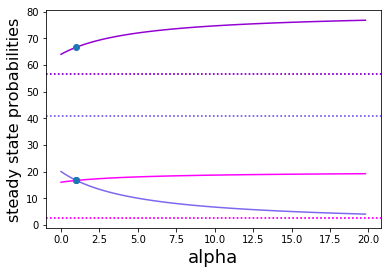

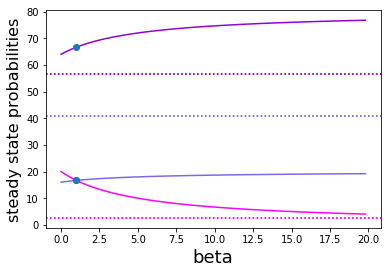

In [7]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        T_expected_narrow = np.asarray([[4+j, 4+i, 4*(3+i+j)],
         [4+j, 4+i, 4*(3+i+j)],
                                       [4+j, 4+i, 4*(3+i+j)]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

5 5


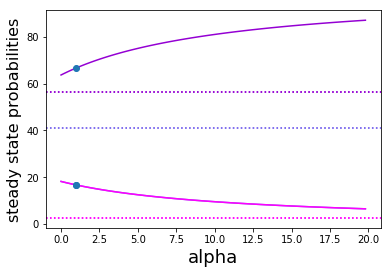

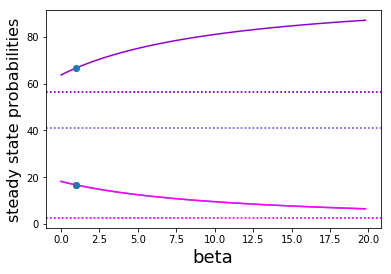

In [8]:
"tESTING HYPOTHESIS WITH all 2 positions for particle to swing to"
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        T_expected_narrow = np.asarray([[0, 0, 4*(i+1)],
         [0, 0, 4*(j+1)],
                                       [2, 2, 2+i+j]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

5 5


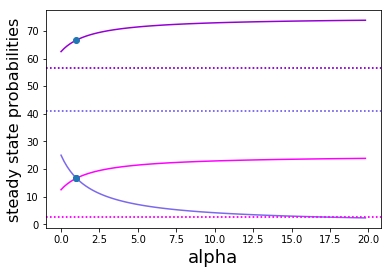

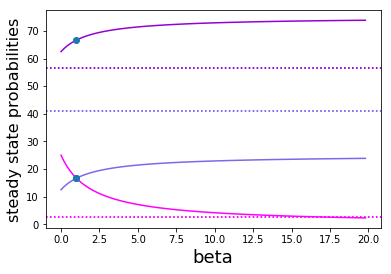

In [9]:
"tESTING HYPOTHESIS WITH all 2 positions for particle to swing tond original state matters"
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        T_expected_narrow = np.asarray([[0, 0, 2*(i+1)],
         [0, 0, 2*(j+1)],
                                       [2/(1+i), 2/(j+1), 2]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

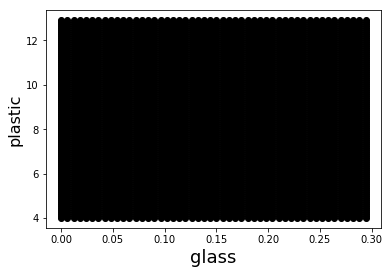

In [10]:
alphas = np.linspace(0,0.3, 50,endpoint =False)
betas = np.linspace(4, 13, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
tolerances = [v1[0],v2[0],v3[0]]
tol = 1
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        
        

        T_expected_narrow = np.asarray([[0, 0, 2*(i+1)],
         [0, 0, 2*(j+1)],
                                       [2/(1+i), 2/(j+1), 2]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        test = all(math.isclose(evec_one[i], tolerances[i], abs_tol = tol)  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(i,j, c=col, marker='o')
        plt.xlabel('glass', fontsize=18)
        plt.ylabel('plastic', fontsize=16)

In [11]:
"tESTING HYPOTHESIS WITH break apart and both weights"
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        p = (j*2/(18*(1+i+j)*(3+i))+
             4*2*(j+1)/(18*2*(3+i)*(1+i+j)*(2+i+j)))
        g = (i*2/(18*(1+i+j)*(3+j))+
             4*2*(i+1)/(18*2*(3+j)*(1+i+j)*(2+i+j)))
        m = (2*j*(i+1)/(18*(3+i)*(1+j+i))+
              8*(i+1)*(j+1)/(18*2*(3+j)*(i+j+1)*(i+j+2))+
              8*(j+1)*(i+1)/(18*2*(3+i)*(i+j+1)*(i+j+2))+
              i*2*(1+j)/(18*(3+j)*(1+i+j)))

        T_expected_narrow = np.asarray([[p, g, m],
                                        [p, g, m],
         [p, g, m]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


5 5


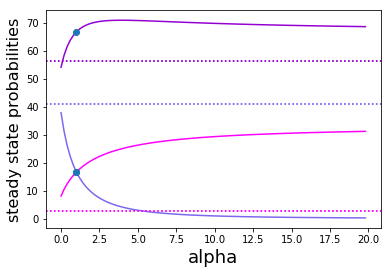

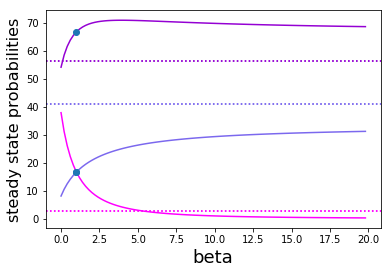

In [12]:
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


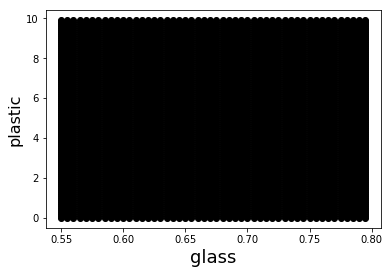

In [13]:
alphas = np.linspace(0.55,0.8, 50,endpoint =False)
betas = np.linspace(0, 10, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
tolerances = [v1[0],v2[0],v3[0]]
tol = 0.8
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        
        p = (j*2/(18*(1+i+j)*(3+i))+
             4*2*(j+1)/(18*2*(3+i)*(1+i+j)*(2+i+j)))
        g = (i*2/(18*(1+i+j)*(3+j))+
             4*2*(i+1)/(18*2*(3+j)*(1+i+j)*(2+i+j)))
        m = (2*j*(i+1)/(18*(3+i)*(1+j+i))+
              8*(i+1)*(j+1)/(18*2*(3+j)*(i+j+1)*(i+j+2))+
              8*(j+1)*(i+1)/(18*2*(3+i)*(i+j+1)*(i+j+2))+
              i*2*(1+j)/(18*(3+j)*(1+i+j)))

        T_expected_narrow = np.asarray([[p, g, m],
                                        [p, g, m],
         [p, g, m]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        test = all(math.isclose(evec_one[i], tolerances[i], abs_tol = tol)  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(i,j, c=col, marker='o')
        plt.xlabel('glass', fontsize=18)
        plt.ylabel('plastic', fontsize=16)